In [4]:
import pandas as pd

In [2]:
!cat train.csv | head

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,,Candra Jacostaffey,True
0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
cat: stdout: Broken p

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.shape

(8693, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df['PassengerId'].nunique() == df.shape[0]

True

In [10]:
df.set_index('PassengerId', inplace=True)

In [11]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
df.select_dtypes(include=['object']).columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'], dtype='object')

In [29]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [30]:
df['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [34]:
df.sample(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
3439_04,Europa,False,B/130/S,TRAPPIST-1e,39.0,False,0.0,2.0,0.0,909.0,3291.0,Cheddin Modent,False
0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True
0546_01,Earth,False,F/96/S,55 Cancri e,24.0,False,930.0,691.0,838.0,0.0,0.0,Shawne Stenson,False


In [35]:
df['target'] = 0
df.loc[df['Transported'] == True, 'target'] = 1

In [37]:
df.sample(4)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,target
PassengerId,,,,,,,,,,,,,,
0771_01,Earth,True,G/112/P,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Troyra Steeletters,False,0
3862_01,Mars,True,F/729/S,55 Cancri e,38.0,False,0.0,0.0,0.0,0.0,0.0,Rohs Paie,True,1
3515_02,Mars,True,F/725/P,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,Crans Purte,True,1
1540_02,Europa,False,C/55/P,TRAPPIST-1e,33.0,True,0.0,7139.0,22.0,0.0,553.0,Duhratz Clumshangs,True,1


In [38]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [39]:
df[df['HomePlanet']=='Earth']['target'].sum()

1951

In [40]:
df.groupby('HomePlanet')['target'].sum()

HomePlanet
Earth     1951
Europa    1404
Mars       920
Name: target, dtype: int64

In [ ]:
# Calcular porcentajes

<AxesSubplot:>

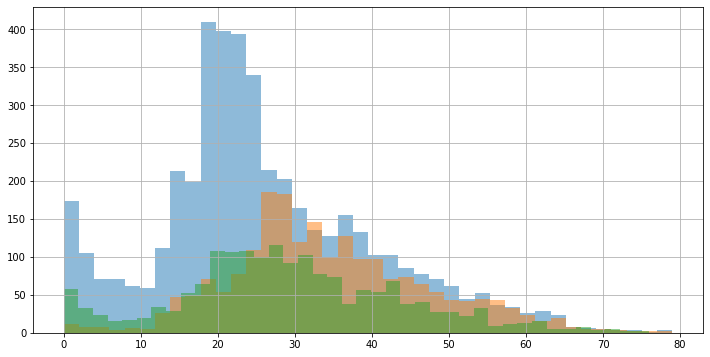

In [41]:
#df.Age.hist(figsize=(12,6), bins=40, alpha=0.5)
df[df['HomePlanet']=='Earth'].Age.hist(figsize=(12,6), bins=40, alpha=0.5)
df[df['HomePlanet']=='Europa'].Age.hist(figsize=(12,6), bins=40, alpha=0.5)
df[df['HomePlanet']=='Mars'].Age.hist(figsize=(12,6), bins=40, alpha=0.5)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

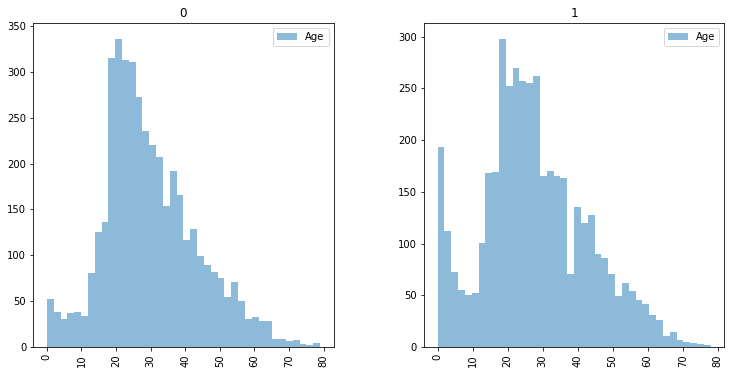

In [42]:
df.hist(column='Age',by='target',figsize=(12,6), bins=40, alpha=0.5, legend=True)

<AxesSubplot:>

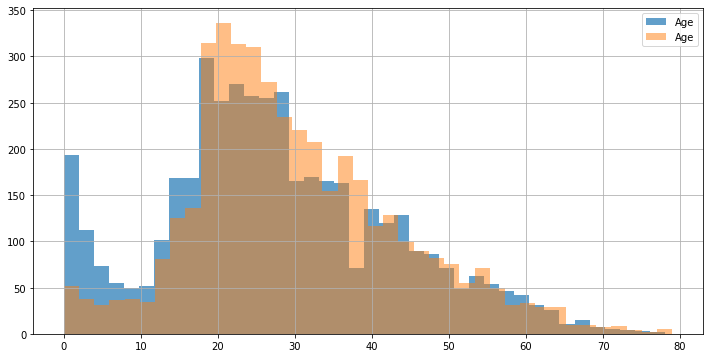

In [43]:
df[df['target']==1].Age.hist(figsize=(12,6), bins=40, alpha=0.7, legend=True)
df[df['target']==0].Age.hist(figsize=(12,6), bins=40, alpha=0.5, legend=True)

In [44]:
df[df['HomePlanet']=='Earth'].Age.describe()

count    4514.000000
mean       26.068232
std        14.317496
min         0.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        79.000000
Name: Age, dtype: float64

In [45]:
df[df['HomePlanet']=='Europa'].Age.describe()

count    2085.000000
mean       34.419664
std        13.089347
min         0.000000
25%        26.000000
50%        33.000000
75%        43.000000
max        79.000000
Name: Age, dtype: float64

In [46]:
df[df['HomePlanet']=='Mars'].Age.describe()

count    1716.000000
mean       29.297203
std        14.558386
min         0.000000
25%        20.000000
50%        28.000000
75%        38.000000
max        76.000000
Name: Age, dtype: float64

In [47]:
df[df['HomePlanet']=='Mars'].Age.describe()

count    1716.000000
mean       29.297203
std        14.558386
min         0.000000
25%        20.000000
50%        28.000000
75%        38.000000
max        76.000000
Name: Age, dtype: float64

In [51]:
num_cols = list(df.select_dtypes(include=['float']).columns)

In [52]:
df[num_cols].isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [44]:
df[(df['HomePlanet']=='Mars')&(df['Age'].isnull())].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,target
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False,0
488,0527_01,Mars,False,F/93/S,55 Cancri e,NaN,False,1172.0,11.0,3.0,0.0,4.0,Supce Stité,False,0
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False,0
652,0684_01,Mars,False,F/145/P,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,0.0,0.0,Sug Conie,True,1
769,0809_02,Mars,False,F/151/S,TRAPPIST-1e,NaN,False,1227.0,42.0,1.0,0.0,0.0,Crin Meake,False,0


In [51]:
df[(df['HomePlanet']=='Mars')&(df['PassengerId'] == '0068_01')]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,target
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,29.297203,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False,0


In [53]:
df[df['HomePlanet']=='Mars'].Age.mean()

29.297202797202797

In [57]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [58]:
planets = ['Europa', 'Earth', 'Mars']

In [54]:
df.groupby('HomePlanet')['Age'].mean()

HomePlanet
Earth     26.068232
Europa    34.419664
Mars      29.297203
Name: Age, dtype: float64

In [60]:
for p in planets:
    df.loc[ (df['Age'].isnull())&(df['HomePlanet']==p) , 'Age'] = df[df['HomePlanet']==p].Age.mean()

In [48]:
df.loc[ (df['Age'].isnull())&(df['HomePlanet']=='Mars') , 'Age'] = df[df['HomePlanet']=='Mars'].Age.mean()

In [61]:
df['Age'].isnull().sum() #179

2

In [69]:
df.loc[ (df['HomePlanet'].isnull()) , 'HomePlanet'] = 'Nibiru'

In [70]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Nibiru     201
Name: HomePlanet, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

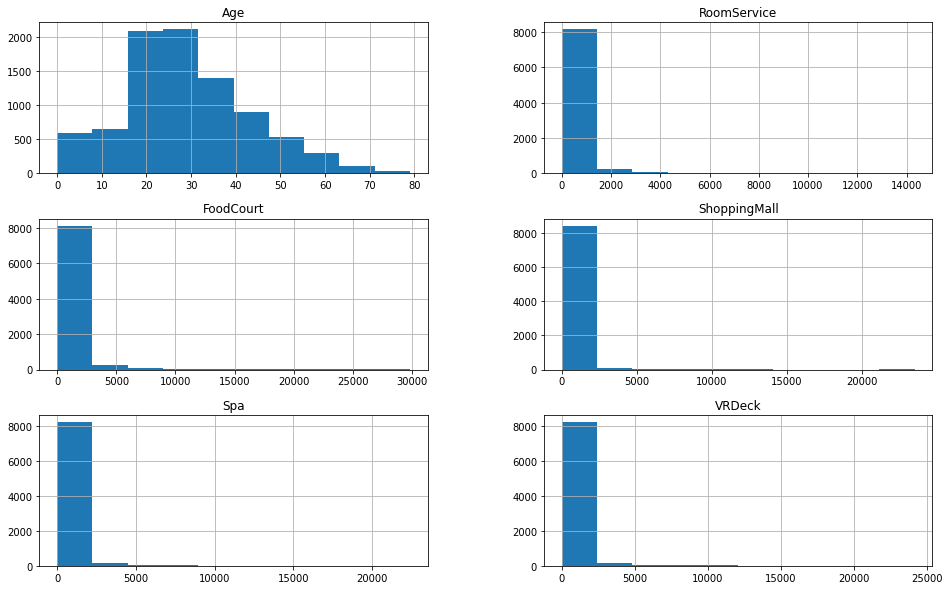

In [76]:
df[num_cols].hist(figsize=(16,10))

In [77]:
df[num_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8691.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.831905,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.349199,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [79]:
import numpy as np

In [87]:
np.nanpercentile(df['RoomService'], 99.9)

7711.136000000872

In [89]:
for num in num_cols:
    df.loc[ df[num].isnull() , num] = np.nanpercentile(df[num], 99.9)
    df[num] = df[num].map(lambda x: np.log(1 + x))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

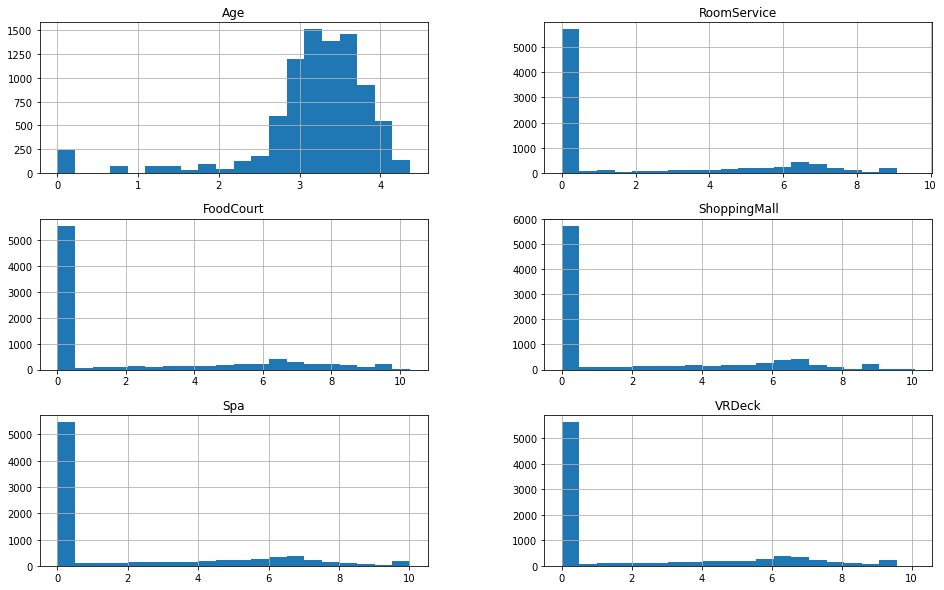

In [92]:
df[num_cols].hist(bins=20, figsize=(16,10))

<AxesSubplot:>

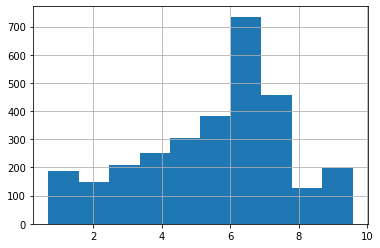

In [94]:
df[df['RoomService']>0]['RoomService'].hist()

In [96]:
X = df[num_cols]
y = df['target']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state=2022, 
                                                    test_size=0.3,
                                                    stratify =y)

In [99]:
# statistical learning
from sklearn.linear_model import LogisticRegression

# tree based methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To measure performance
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [102]:
dt = DecisionTreeClassifier(ccp_alpha=9e-05, 
                            criterion='entropy', 
                            max_depth=16,
                            #max_features=12, 
                            random_state=2022)

In [103]:
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

In [105]:
accuracies =dict()
recall = dict()

In [106]:
accuracies['Decision Tree Classifier'] = accuracy_score(y_pred, y_test)
recall['Decision Tree Classifier'] = metrics.recall_score(y_test,y_pred)

print('Accuracy of Decision Tree Classifier is: ', accuracy_score(y_test,y_pred))
print('Recall Score of Decision Tree Classifier is: ', metrics.recall_score(y_test, y_pred))

Accuracy of Decision Tree Classifier is:  0.7584355828220859
Recall Score of Decision Tree Classifier is:  0.8286367098248286


In [107]:
from sklearn.metrics import confusion_matrix as cfm
from sklearn.metrics import classification_report

In [108]:
cfm(y_test, y_pred)

array([[ 890,  405],
       [ 225, 1088]])

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1295
           1       0.73      0.83      0.78      1313

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608

